In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv("dataset/skin_cancer_prediction_clinical_data.csv",)

# 1. Dataset presentation and preparation

## 1.1 Dataset presentation

**The project is based on a medical dataset focused on skin cancer detection. This dataset contains 3,000 observations and 23 features, each representing a clinical measurement, a patient habit, or an indicator derived from the analysis of dermatological images. The objective is to predict a binary target variable indicating the presence or absence of malignancy.**

In [7]:
df.head(10)

,Patient_ID,Age,Gender,Skin_Type,UV_Exposure_Level,Family_History,History_of_Sunburns,Mole_Count,Itching,Bleeding,...,Evolving,Pain,Scaliness,Oozing,Location,Immune_Status,Smoking_Habit,Alcohol_Consumption,BMI,Cancer_Diagnosis
0,PID100000,69,Male,V,Low,0,1,13,0,1,...,0,0,0,0,Chest,Normal,Non-Smoker,High,27.24,0
1,PID100001,32,Male,IV,High,0,4,11,0,0,...,0,0,0,0,Face,Suppressed,Non-Smoker,Moderate,28.32,0
2,PID100002,89,Male,I,Moderate,0,3,15,0,0,...,0,0,0,0,Face,Normal,Current Smoker,Moderate,25.69,0
3,PID100003,78,Male,I,High,1,4,9,0,0,...,0,0,0,0,Scalp,Normal,Non-Smoker,Moderate,27.44,0
4,PID100004,38,Female,V,Low,1,2,12,0,0,...,0,0,0,0,Back,Suppressed,Current Smoker,Moderate,33.46,0
5,PID100005,41,Female,IV,Moderate,1,0,20,0,0,...,0,0,1,0,Legs,Suppressed,Non-Smoker,Moderate,23.24,0
6,PID100006,20,Female,IV,Low,1,0,17,0,0,...,0,0,0,0,Legs,Suppressed,Non-Smoker,NaN,23.45,0
7,PID100007,39,Female,II,Low,0,3,15,0,0,...,0,0,0,0,Arms,Normal,Former Smoker,Moderate,33.42,0
8,PID100008,70,Male,VI,Low,0,4,11,1,0,...,0,0,0,0,Face,Normal,Non-Smoker,NaN,30.20,0
9,PID100009,19,Male,III,High,1,2,16,0,0,...,0,0,1,1,Chest,Normal,Non-Smoker,Moderate,24.31,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           3000 non-null   object 
 1   Age                  3000 non-null   int64  
 2   Gender               3000 non-null   object 
 3   Skin_Type            3000 non-null   object 
 4   UV_Exposure_Level    3000 non-null   object 
 5   Family_History       3000 non-null   int64  
 6   History_of_Sunburns  3000 non-null   int64  
 7   Mole_Count           3000 non-null   int64  
 8   Itching              3000 non-null   int64  
 9   Bleeding             3000 non-null   int64  
 10  Asymmetry            3000 non-null   int64  
 11  Border_Irregularity  3000 non-null   int64  
 12  Color_Variation      3000 non-null   int64  
 13  Diameter_mm          3000 non-null   float64
 14  Evolving             3000 non-null   int64  
 15  Pain                 3000 non-null   i

We realize that the 'object' types will not be compatible with the classification models; they need to be encoded :

In [9]:
#One-Hot Encoding
df = pd.get_dummies(df, columns=['Gender', 'Skin_Type', 'UV_Exposure_Level', 'Location', 'Immune_Status', 'Smoking_Habit', 'Alcohol_Consumption'])

In [10]:
#Conversion False/True -> 0/1
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [11]:
df.head()

,Patient_ID,Age,Family_History,History_of_Sunburns,Mole_Count,Itching,Bleeding,Asymmetry,Border_Irregularity,Color_Variation,...,Location_Face,Location_Legs,Location_Scalp,Immune_Status_Normal,Immune_Status_Suppressed,Smoking_Habit_Current Smoker,Smoking_Habit_Former Smoker,Smoking_Habit_Non-Smoker,Alcohol_Consumption_High,Alcohol_Consumption_Moderate
0,PID100000,69,0,1,13,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1,PID100001,32,0,4,11,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,1
2,PID100002,89,0,3,15,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
3,PID100003,78,1,4,9,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,1
4,PID100004,38,1,2,12,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1


The dataset is now adapted to the classification models that will be used.

Let’s explore it in a bit more detail.

## 1.2 Dataset exploration

In [12]:
df.isnull().sum()

Patient_ID                      0
Age                             0
Family_History                  0
History_of_Sunburns             0
Mole_Count                      0
Itching                         0
Bleeding                        0
Asymmetry                       0
Border_Irregularity             0
Color_Variation                 0
Diameter_mm                     0
Evolving                        0
Pain                            0
Scaliness                       0
Oozing                          0
BMI                             0
Cancer_Diagnosis                0
Gender_Female                   0
Gender_Male                     0
Skin_Type_I                     0
Skin_Type_II                    0
Skin_Type_III                   0
Skin_Type_IV                    0
Skin_Type_V                     0
Skin_Type_VI                    0
UV_Exposure_Level_High          0
UV_Exposure_Level_Low           0
UV_Exposure_Level_Moderate      0
Location_Arms                   0
Location_Back 

No missing values.

In [13]:
df.drop_duplicates()

,Patient_ID,Age,Family_History,History_of_Sunburns,Mole_Count,Itching,Bleeding,Asymmetry,Border_Irregularity,Color_Variation,...,Location_Face,Location_Legs,Location_Scalp,Immune_Status_Normal,Immune_Status_Suppressed,Smoking_Habit_Current Smoker,Smoking_Habit_Former Smoker,Smoking_Habit_Non-Smoker,Alcohol_Consumption_High,Alcohol_Consumption_Moderate
0,PID100000,69,0,1,13,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1,PID100001,32,0,4,11,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,1
2,PID100002,89,0,3,15,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
3,PID100003,78,1,4,9,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,1
4,PID100004,38,1,2,12,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,PID102995,44,0,2,17,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2996,PID102996,51,0,3,13,0,0,1,1,1,...,0,1,0,1,0,0,0,1,0,1
2997,PID102997,61,1,1,14,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2998,PID102998,85,0,1,17,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0


No duplicate values.

In [14]:
df.describe()

,Age,Family_History,History_of_Sunburns,Mole_Count,Itching,Bleeding,Asymmetry,Border_Irregularity,Color_Variation,Diameter_mm,...,Location_Face,Location_Legs,Location_Scalp,Immune_Status_Normal,Immune_Status_Suppressed,Smoking_Habit_Current Smoker,Smoking_Habit_Former Smoker,Smoking_Habit_Non-Smoker,Alcohol_Consumption_High,Alcohol_Consumption_Moderate
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,52.891000,0.31000,2.043000,14.981333,0.150000,0.094000,0.197000,0.202333,0.256000,4.991430,...,0.159667,0.164667,0.171667,0.845333,0.154667,0.136000,0.262000,0.602000,0.097333,0.411000
std,20.684448,0.46257,1.444477,3.924553,0.357131,0.291877,0.397799,0.401806,0.436495,1.960332,...,0.366358,0.370941,0.377153,0.361647,0.361647,0.342846,0.439796,0.489567,0.296461,0.492097
min,18.000000,0.00000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.970000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.00000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.627500,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,52.000000,0.00000,2.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.960000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,71.000000,1.00000,3.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.312500,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,89.000000,1.00000,8.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.670000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


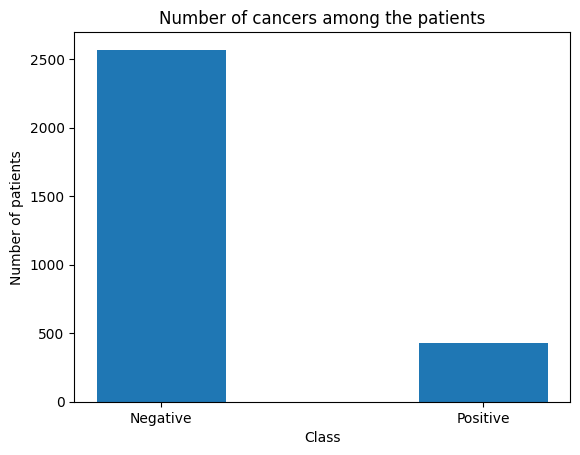

Cancer_Diagnosis
0    2568
1     432
Name: count, dtype: int64


In [15]:
counts = df['Cancer_Diagnosis'].value_counts()

plt.bar(['Negative', 'Positive'], counts, width=0.4)
plt.xlabel('Class')
plt.ylabel('Number of patients')
plt.title('Number of cancers among the patients')
plt.show()
print(counts)


**The class distribution is quite imbalanced, with approximately 85% negatives and 15% positives. This leads us to use the F1 score as the metric rather than standard accuracy.**

In [16]:
df = df.drop(columns = ['Patient_ID'])

In [17]:
df.head()

,Age,Family_History,History_of_Sunburns,Mole_Count,Itching,Bleeding,Asymmetry,Border_Irregularity,Color_Variation,Diameter_mm,...,Location_Face,Location_Legs,Location_Scalp,Immune_Status_Normal,Immune_Status_Suppressed,Smoking_Habit_Current Smoker,Smoking_Habit_Former Smoker,Smoking_Habit_Non-Smoker,Alcohol_Consumption_High,Alcohol_Consumption_Moderate
0,69,0,1,13,0,1,0,0,0,4.49,...,0,0,0,1,0,0,0,1,1,0
1,32,0,4,11,0,0,1,0,0,3.16,...,1,0,0,0,1,0,0,1,0,1
2,89,0,3,15,0,0,1,0,0,4.13,...,1,0,0,1,0,1,0,0,0,1
3,78,1,4,9,0,0,0,0,0,0.91,...,0,0,1,1,0,0,0,1,0,1
4,38,1,2,12,0,0,0,0,0,4.36,...,0,0,0,0,1,1,0,0,0,1


**The dataset is cleaned and is now ready to be used.**

# 2. Classical reference models

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np
import random

#Data
X = df.drop(columns=['Cancer_Diagnosis'])
Y = df['Cancer_Diagnosis'].values

#Train/Test Split 70/30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#Lightweight version to reduce execution times
X_train = X_train.iloc[:100, :]
X_test = X_test.iloc[:100, :]
y_train = y_train[:100]
y_test = y_test[:100]

#Normalisation
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


results = []

def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append((name, acc, f1))
    print(name, " : Accuracy:", acc, "/// F1-score (weighted):", f1)

#Logistic Regression
evaluate_model("Logistic Regression", LogisticRegression(C=2, random_state=42, class_weight='balanced'))

#KNN
evaluate_model("KNN (k=8)", KNeighborsClassifier(n_neighbors=8))

#Random Forest
evaluate_model("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))

#SVM
evaluate_model("SVM", SVC(kernel='rbf'))


Logistic Regression  : Accuracy: 0.72 /// F1-score (weighted): 0.7430588235294118
KNN (k=8)  : Accuracy: 0.88 /// F1-score (weighted): 0.8238297872340425
Random Forest  : Accuracy: 0.88 /// F1-score (weighted): 0.8238297872340425
SVM  : Accuracy: 0.88 /// F1-score (weighted): 0.8238297872340425


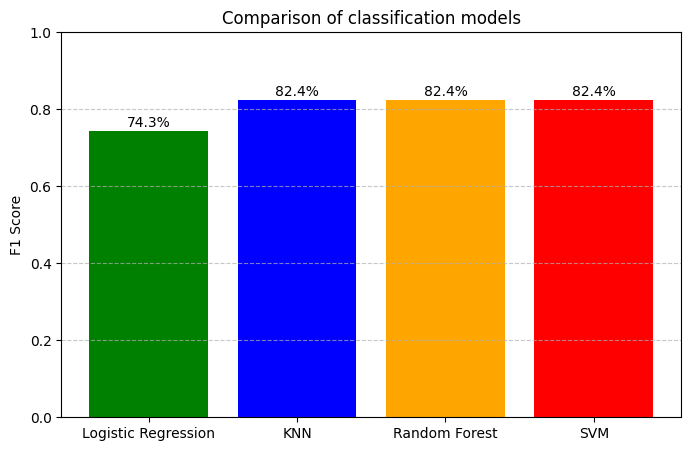

In [15]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'KNN', 'Random Forest', 'SVM']

f1 = [0.7430, 0.8238, 0.8238, 0.8238]

plt.figure(figsize=(8,5))
plt.bar(models, f1, color=['green', 'blue', 'orange', 'red'])
plt.ylim(0, 1)
plt.ylabel('F1 Score')
plt.title('Comparison of classification models')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, f1s in enumerate(f1):
    plt.text(i, f1s + 0.01, f"{f1s*100:.1f}%", ha='center')

plt.show()

**The KNN, Random Forest, and SVM models give the same results. From here on, let’s use, for example, Random Forest as a baseline and try to improve the score.**

# 3. Genetic algorithms

## First implementation

In [20]:
#Data
X = df.drop(columns=['Cancer_Diagnosis'])
Y = df['Cancer_Diagnosis'].values

#Train/Test Split 70/30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape)

(2100, 39)


In [21]:
#Lightweight version to reduce execution times
X_train = X_train.iloc[:100, :]
X_test = X_test.iloc[:100, :]
y_train = y_train[:100]
y_test = y_test[:100]

First, let's start by generating an initial population

In [18]:
import random

#Initial population
population = []

n = X_train.shape[0]*0.2  #20% of [1, 1, ..., 1] chromosomes
n = int(n)

chromosome = np.ones(X_train.shape[1], dtype=int)
for i in range(n):
    population.append(chromosome.copy())

N = X_train.shape[0] - n

for i in range(N):
    r = random.uniform(0.3, 0.7)
    n_ones = int(r*X_train.shape[1])
    chromosome = np.array([1] * n_ones + [0] * (X_train.shape[1] - n_ones))
    np.random.shuffle(chromosome)
    population.append(chromosome)

random.shuffle(population)

Next, we define the functions that serve as the backbone of the genetic algorithm.

In [19]:
def fitness_fct(population):
    f1score = []
    for chromosome in population:
        X_train2 = X_train.copy()
        X_test2  = X_test.copy()
        col = []

        #If the gene is 1, we keep the feature for evaluation
        #If the gene is 0, we do not
        for i in range(len(chromosome)) :
            if chromosome[i] == 0:
                col.append(i)
        X_train2 = X_train2.drop(X_train2.columns[col], axis=1)
        X_test2  = X_test2.drop(X_test2.columns[col], axis=1)

        #Evaluation
        forest = RandomForestClassifier(n_estimators=100, random_state=42)
        forest.fit(X_train2, y_train)
        y_pred = forest.predict(X_test2)

        #f1 score
        f1score.append(f1_score(y_test, y_pred, average='weighted'))
    return(f1score)

In [20]:
def selection_tournament(population, f1_list, tournament_size, n_parents):
    parents = []
    while len(parents) < n_parents:
        indices = []

        #We randomly choose 5 individuals
        indices = random.sample(range(len(population)), tournament_size)

        #We keep the one with the best f1 score
        max_acc = f1_list[indices[0]]
        best_i = indices[0]
        for j in range (1, len(indices)):
            if f1_list[indices[j]] > max_acc:
                max_acc = f1_list[indices[j]]
                best_i = indices[j]
        parents.append((population[best_i].copy(), f1_list[best_i]))

    return parents

In [21]:
def reproduction(parents, n_children):
    children = []
    while len(children) < n_children:

        #One point crossover
        p_indices = random.sample(range(len(parents)), 2)
        p1 = parents[p_indices[0]]
        p2 = parents[p_indices[1]]
        x = random.randint(1, len(p1) - 1)

        c1 = np.concatenate([p1[:x], p2[x:]])
        c2 = np.concatenate([p2[:x], p1[x:]])

        children.append(c1)
        children.append(c2)

    return children

In [22]:
def replacement(parents, children, next_gen_size):

    parents_sorted = sorted(parents, key=lambda x: x[1], reverse=True)

    parents_sorted2 = []
    for i in range(len(parents_sorted)):
        parents_sorted2.append(parents_sorted[i][0])

    #We keep the 20% best parents
    elite = int(0.2 * next_gen_size)

    elite_parents = parents_sorted2[:elite]

    #The rest of the next generation is filled with the children
    next_gen = elite_parents + children

    return next_gen

In [23]:
def gen_algo(population, n_generations, tournament_size, n_parents):
    pop_size = len(population)
    best_scores = []
    best_chromosomes = []

    for gen in range(n_generations):

        #Evaluation of the population
        f1 = fitness_fct(population)

        #Best chromosome
        best_idx = np.argmax(f1)
        best_f1 = f1[best_idx]
        best_chromosome = population[best_idx].copy()

        best_scores.append(best_f1)
        best_chromosomes.append(best_chromosome)

        print("Generation", gen+1, "/", n_generations, ": Best f1 score : ", best_f1)
        print(best_chromosome)

        #Next step of the algorithm

        #Selection
        parents = selection_tournament(population, f1, tournament_size, n_parents)

        parent_chromosomes = [p[0] for p in parents]
        n_children = pop_size - len(parent_chromosomes)

        #Reproduction
        children = reproduction(parent_chromosomes, n_children)

        #Replacement
        population = replacement(parents, children, pop_size)

    return best_scores, best_chromosomes


In [24]:
best_scores, best_chromosomes = gen_algo(population, 10, 5, 20)

Generation 1 / 10 : Best f1 score :  0.8466968325791855
[0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0
 0 1]
Generation 2 / 10 : Best f1 score :  0.8466968325791855
[0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0
 0 1]
Generation 3 / 10 : Best f1 score :  0.8466968325791855
[0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Generation 4 / 10 : Best f1 score :  0.8669738863287252
[0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1
 0 0]
Generation 5 / 10 : Best f1 score :  0.8669738863287252
[0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1
 0 0]
Generation 6 / 10 : Best f1 score :  0.8694567663130826
[0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1
 0 0]
Generation 7 / 10 : Best f1 score :  0.8771739130434782
[0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 0]
Generation 8 / 10 : Best f1 score :  0.87

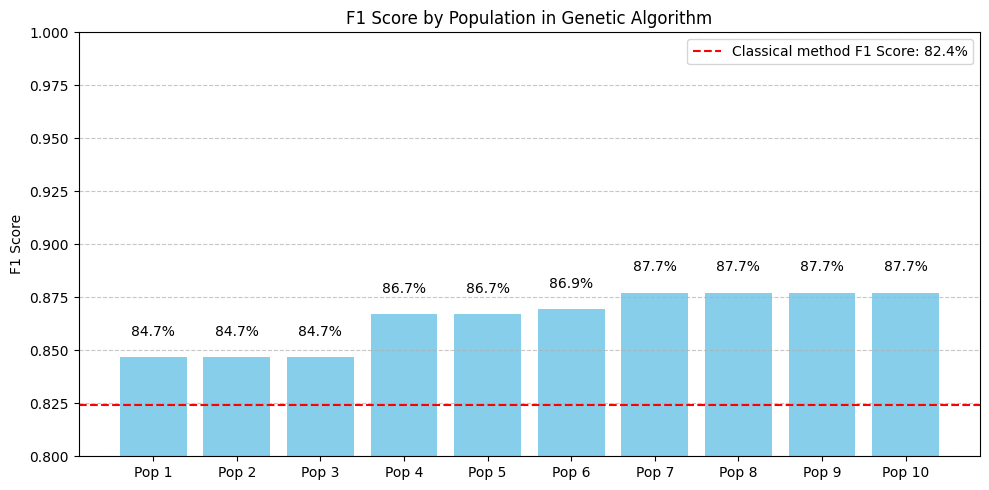

In [26]:
import matplotlib.pyplot as plt

populations = [f'Pop {i+1}' for i in range(len(best_scores))]

plt.figure(figsize=(10, 5))
plt.bar(populations, best_scores, color='skyblue')
plt.ylim(0.8, 1)
plt.ylabel('F1 Score')
plt.title('F1 Score by Population in Genetic Algorithm')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, f1 in enumerate(best_scores):
    plt.text(i, f1 + 0.01, f"{f1*100:.1f}%", ha='center')

plt.axhline(
    y=0.824,
    color='red',
    linestyle='--',
    label=f'Classical method F1 Score: {0.824*100:.1f}%'
)

plt.legend()
plt.tight_layout()
plt.show()


**After one generation of 10 populations, this first version makes it possible to increase the score by 5.3%. This is a good initial improvement, but we can try to do even better by adding a mutation step.**

## Second implementation - Mutation added

Let's add the mutation step in order to improve the results

In [27]:
def mutation(children, mutation_rate):
    for chromosome in children:
        mutation = np.random.rand(len(chromosome)) < mutation_rate
        for i in range(len(chromosome)):
            if mutation[i] == True:
                chromosome[i] = 1 - chromosome[i]
    return children

In [28]:
def gen_algo_mut(population, n_generations, tournament_size, n_parents, mutation_rate):
    pop_size = len(population)
    best_scores = []
    best_chromosomes = []

    for gen in range(n_generations):

        #Evaluation of the population
        f1 = fitness_fct(population)

        #Best chromosome
        best_idx = np.argmax(f1)
        best_f1 = f1[best_idx]
        best_chromosome = population[best_idx].copy()

        best_scores.append(best_f1)
        best_chromosomes.append(best_chromosome)

        print("Generation", gen+1, "/", n_generations, ": Best f1 score : ", best_f1)
        print(best_chromosome)

        #Next step of the algorithm

        #Selection
        parents = selection_tournament(population, f1, tournament_size, n_parents)

        parent_chromosomes = [p[0] for p in parents]
        n_children = pop_size - len(parent_chromosomes)

        #Reproduction
        children = reproduction(parent_chromosomes, n_children)

        #Mutation
        children_mutated = mutation(children, mutation_rate)

        #Replacement
        population = replacement(parents, children_mutated, pop_size)

    return best_scores, best_chromosomes

In [29]:
best_scores_mut, best_chromosomes_mut = gen_algo_mut(population, 10, 5, 20, 0.1)

Generation 1 / 10 : Best f1 score :  0.8466968325791855
[0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0
 0 1]
Generation 2 / 10 : Best f1 score :  0.8466968325791855
[0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0
 0 1]
Generation 3 / 10 : Best f1 score :  0.8669738863287252
[0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0
 0 0]
Generation 4 / 10 : Best f1 score :  0.8694567663130826
[0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0
 0 0]
Generation 5 / 10 : Best f1 score :  0.8694567663130826
[0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0
 0 0]
Generation 6 / 10 : Best f1 score :  0.8931918997107039
[0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0
 0 1]
Generation 7 / 10 : Best f1 score :  0.8851891891891891
[0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1
 0 0]
Generation 8 / 10 : Best f1 score :  0.89

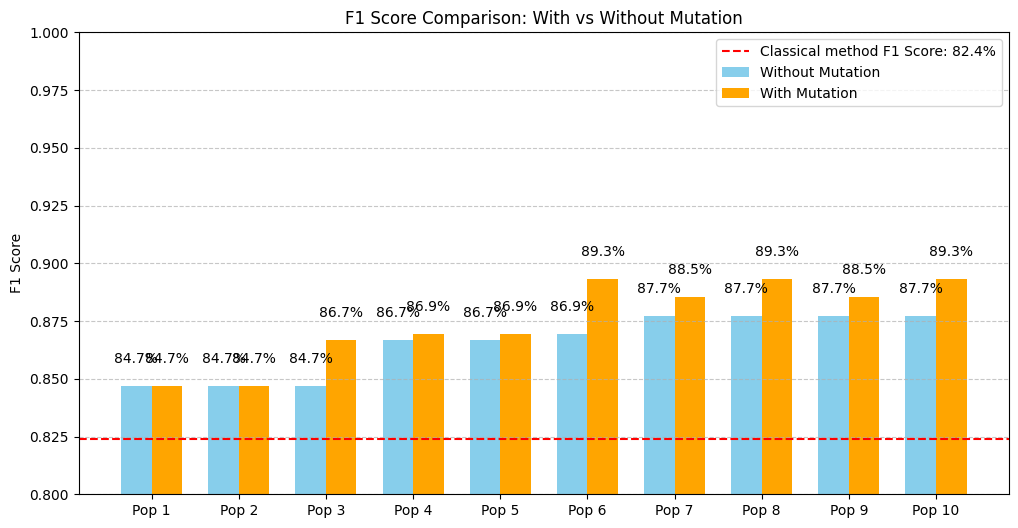

In [30]:
import numpy as np
import matplotlib.pyplot as plt

populations = [f'Pop {i}' for i in range(1, 11)]

best_accuracy = 0.824


x = np.arange(len(populations))
width = 0.35


plt.figure(figsize=(12,6))
plt.bar(x - width/2, best_scores, width, label='Without Mutation', color='skyblue')
plt.bar(x + width/2, best_scores_mut, width, label='With Mutation', color='orange')

plt.axhline(y=best_accuracy, color='red', linestyle='--', label=f'Classical method F1 Score: {best_accuracy*100:.1f}%')

plt.ylim(0.8, 1)
plt.xticks(x, populations)
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison: With vs Without Mutation')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()


for i, acc in enumerate(best_scores):
    plt.text(i - width/2, acc + 0.01, f"{acc*100:.1f}%", ha='center')

for i, acc in enumerate(best_scores_mut):
    plt.text(i + width/2, acc + 0.01, f"{acc*100:.1f}%", ha='center')

plt.show()


**We observe that with the mutation step, the obtained score is generally better for each population. Moreover, we manage to reach a final score of 89.3%, which corresponds to an increase of 6.9% compared to the initial score.**

**This result is very good and shows that the algorithm works efficiently. However, further modifications can be made, notably by changing the selection / reproduction / replacement modes.**

## Other implementations - Different selection / crossover / replacement modes

### Selection

In [31]:
#Wheel selection

def wheel_selection(population, f1_list, n_parents):
    f1 = np.array(f1_list)
    probabilities = f1 / f1.sum()

    parents = []
    for _ in range(n_parents):
        idx = np.random.choice(len(population), p=probabilities)
        parents.append((population[idx].copy(), f1_list[idx]))

    return parents

In [32]:
#Sorted selection

def sorted_selection(population, f1_list, n_parents):
    sorted_indices = np.argsort(f1_list)[::-1]

    parents = []
    for i in sorted_indices[:n_parents]:
        parents.append((population[i].copy(), f1_list[i]))

    return parents

### Reproduction

In [33]:
#Multipoint reproduction

def reproduction_multipoint(parents, n_children, n_points=2):
    children = []
    L = len(parents[0])

    while len(children) < n_children:
        i1, i2 = random.sample(range(len(parents)), 2)
        p1 = parents[i1]
        p2 = parents[i2]

        cuts = sorted(random.sample(range(1, L), n_points))
        cuts = [0] + cuts + [L]

        c1 = np.zeros(L, dtype=int)
        c2 = np.zeros(L, dtype=int)

        swap = False
        for i in range(len(cuts) - 1):
            a, b = cuts[i], cuts[i + 1]
            if not swap:
                c1[a:b] = p1[a:b]
                c2[a:b] = p2[a:b]
            else:
                c1[a:b] = p2[a:b]
                c2[a:b] = p1[a:b]
            swap = not swap

        children.append(c1)
        children.append(c2)

    return children[:n_children]


### Replacement

In [34]:
#Pure elitism replacement

def pure_elitism_replacement(parents, children, next_gen_size):

    children_scores = fitness_fct(children)
    children_with_scores = [(children[i], children_scores[i]) for i in range(len(children))]


    combined = parents + children_with_scores
    combined_sorted = sorted(combined, key=lambda x: x[1], reverse=True)

    next_gen = [combined_sorted[i][0] for i in range(next_gen_size)]

    return next_gen


### Best combinaison

After trying many combinations, the best results were obtained with the following combination: **Sorting based selection / Multi point crossover / Classical replacement.**

In [35]:
def gen_algo_best(population, n_generations, n_parents, mutation_rate,  n_points):
    pop_size = len(population)
    best_scores = []
    best_chromosomes = []

    for gen in range(n_generations):

        #Evaluation of the population
        f1 = fitness_fct(population)

        #Best chromosome
        best_idx = np.argmax(f1)
        best_f1 = f1[best_idx]
        best_chromosome = population[best_idx].copy()

        best_scores.append(best_f1)
        best_chromosomes.append(best_chromosome)

        print("Generation", gen+1, "/", n_generations, ": Best f1 score : ", best_f1)
        print(best_chromosome)

        #Next step of the algorithm

        #Selection
        parents = sorted_selection(population, f1, n_parents)

        parent_chromosomes = [p[0] for p in parents]
        n_children = pop_size - len(parent_chromosomes)

        #Reproduction
        children = reproduction_multipoint(parent_chromosomes, n_children, n_points)

        #Mutation
        children_mutated = mutation(children, mutation_rate)

        #Replacement
        population = replacement(parents, children, pop_size)

    return best_scores, best_chromosomes

In [40]:
best_scores2, best_chromosomes2 = gen_algo_best(population, 10, 20, 0.1, 4)

Generation 1 / 10 : Best f1 score :  0.8466968325791855
[0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0
 0 1]
Generation 2 / 10 : Best f1 score :  0.8669738863287252
[0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0
 0 1]
Generation 3 / 10 : Best f1 score :  0.8694567663130826
[0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1
 0 0]
Generation 4 / 10 : Best f1 score :  0.8694567663130826
[0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1
 0 0]
Generation 5 / 10 : Best f1 score :  0.8771739130434782
[0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0
 0 0]
Generation 6 / 10 : Best f1 score :  0.8994009886594939
[0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1
 0 0]
Generation 7 / 10 : Best f1 score :  0.8994009886594939
[0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0
 0 0]
Generation 8 / 10 : Best f1 score :  0.89

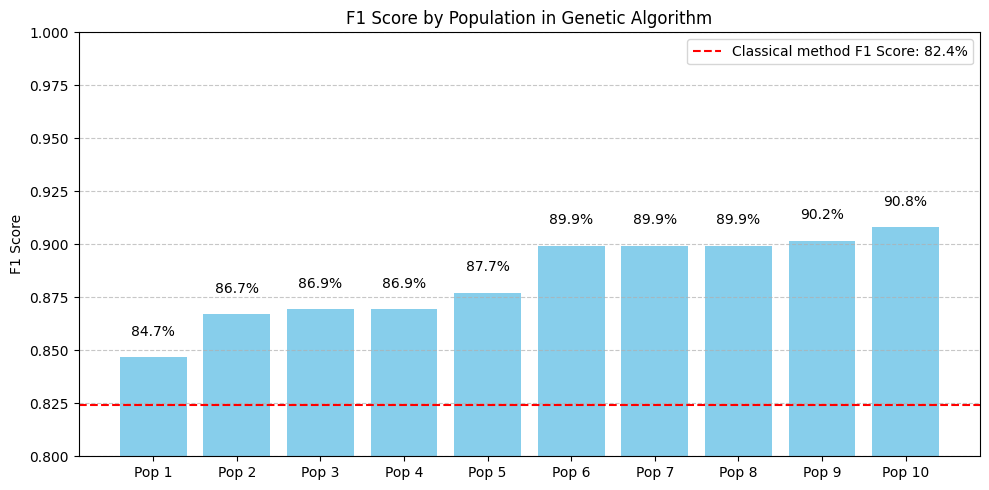

In [44]:
populations = [f'Pop {i+1}' for i in range(len(best_scores2))]

plt.figure(figsize=(10, 5))
plt.bar(populations, best_scores2, color='skyblue')
plt.ylim(0.8, 1)
plt.ylabel('F1 Score')
plt.title('F1 Score by Population in Genetic Algorithm')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, f1 in enumerate(best_scores2):
    plt.text(i, f1 + 0.01, f"{f1*100:.1f}%", ha='center')

plt.axhline(
    y=0.824,
    color='red',
    linestyle='--',
    label=f'Classical method F1 Score: {0.824*100:.1f}%'
)

plt.legend()
plt.tight_layout()
plt.show()


**Indeed, we obtain the best score with this version, 90.8%. This represents an increase of 8.4% compared to the initial score.**

**This combination is the most effective because it balances convergence and diversity. Sorting based selection quickly promotes the best individuals, multi point crossover enhances genetic diversity and exploration, and classical replacement preserves the top 20% of parents while allowing new offspring to improve the population. This balance prevents premature convergence and leads to better overall performance.**

# Appendix

We can also have a look to accuracy even if in our case it's not the most relevant metric, but often considered a more intuitive

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

chromosome = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0]

cols_to_drop = [i for i, gene in enumerate(chromosome) if gene == 0]

X_train2 = X_train.drop(X_train.columns[cols_to_drop], axis=1)
X_test2  = X_test.drop(X_test.columns[cols_to_drop], axis=1)

forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train2, y_train)
y_pred = forest.predict(X_test2)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")


Accuracy: 0.9200


This optimal model reached 0.92 of accuracy compared to the baseline of 0.88, representing a clear 4% improvement.